<a href="https://colab.research.google.com/github/allanzim/treinamento/blob/master/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  %pip install sidetable

  import numpy as np
  import pandas as pd

  import sidetable
  from scipy import stats

  import seaborn as sns
  import matplotlib.pyplot as plt

  import plotly.express as px
  import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='viridis',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

In [ ]:
df_tips = sns.load_dataset('tips')
print(df_tips.shape)
df_tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_tips_sample = df_tips.sample(50)
print(df_tips_sample.shape)
df_tips_sample.head()

(50, 7)


,total_bill,tip,sex,smoker,day,time,size
106,20.49,4.06,Male,Yes,Sat,Dinner,2
115,17.31,3.50,Female,No,Sun,Dinner,2
200,18.71,4.00,Male,Yes,Thur,Lunch,3
181,23.33,5.65,Male,Yes,Sun,Dinner,2
79,17.29,2.71,Male,No,Thur,Lunch,2


In [ ]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
df_tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
# metodos que retornam o mesmo resultado
df_tips['tip'].mean()


2.99827868852459

In [ ]:
df_tips['tip'].agg('mean')

2.99827868852459

In [ ]:
np.mean(df_tips['tip'])

2.99827868852459

In [ ]:
np.sum(df_tips['tip'])/len(df_tips['tip'])

2.99827868852459

In [ ]:
#media ponderada
np.average(df_tips['tip'], weights=df_tips['size'])

3.2478309409888357

In [ ]:
values = df_tips['tip'].sort_values().reset_index(drop=True)
values

0       1.00
1       1.00
2       1.00
3       1.00
4       1.01
       ...  
239     6.70
240     6.73
241     7.58
242     9.00
243    10.00
Name: tip, Length: 244, dtype: float64

In [ ]:
n = len(values[10:-10])
print(n, len(values), len(values[10:-10]))
values[10:-10].sum()/ (n)



224 244 224


2.9007589285714284

In [ ]:
#media interna ou media trimada - excluí-se as proporções X, ignora as proporções mais ao extremo da lista stats.trim_mean(values, X)
stats.trim_mean(values, .1)

2.842704081632653

In [ ]:
#media harmônica
stats.hmean(values)

2.482252914784503

In [ ]:
values = [4,50,3,1,2]



In [ ]:
sorted_values = sorted(values)
sorted_values



[1, 2, 3, 4, 50]

In [ ]:
n = len(sorted_values)
pos = int((n+1)/2 -1)
values[pos]

3

In [ ]:
values = np.array([8,6,7,6,85,10])
sorted_values = sorted_values = np.sort(values)
# ou, porém não converte pra array e não pode usar os index
# sorted_values = sorted(values)
print(sorted_values)

[ 6  6  7  8 10 85]


In [ ]:
n = len(sorted_values)
pos = np.array([(n/2), (n/2+1)]) -1
sorted_values[pos.astype(int)].mean()


7.5

In [ ]:
np.median(sorted_values)

7.5

In [ ]:
# duas maneiras de calcular mediana - NÃO ESQUECER DE COLOCAR EM ORDEM A SERIE
df_tips['tip'].median()

2.9

In [ ]:
# no agg('') o método agrupa por alguma função (soma, media, mediana, etc...)
df_tips['tip'].agg('median')

2.9

In [ ]:
# valores que mais aparecem

df_tips['total_bill'].value_counts()

13.42    3
13.81    2
15.98    2
17.92    2
10.07    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

In [ ]:
# metodos de tirar a moda - a agragação de dados é por parâmetro

df_tips['day'].agg('mode')

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
df_tips['day'].mode()

0    Sat
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
pd.Series.mode([df_tips])

# passando varios valores de moda dentro do método:

# pd.Series.mode(['A', 'A', 'B', 'B', 'C', 'C])
pd.Series.mode(['A','B','C'])

0    A
1    B
2    C
dtype: object

In [ ]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
np.median(df_tips['tip'])

2.9

In [ ]:
# separa em porcentage de 25% cada
df_tips['tip'].quantile([.25, .5, .75, 1])

0.25     2.0000
0.50     2.9000
0.75     3.5625
1.00    10.0000
Name: tip, dtype: float64

In [ ]:
# separa em porcentagem de X% cada
decis = np.arange(1,11)/10
df_tips['tip'].quantile(decis)

0.1     1.500
0.2     2.000
0.3     2.000
0.4     2.476
0.5     2.900
0.6     3.016
0.7     3.480
0.8     4.000
0.9     5.000
1.0    10.000
Name: tip, dtype: float64

In [ ]:
df_tips['tip'].quantile([0.01, .99])

0.01    1.0000
0.99    7.2145
Name: tip, dtype: float64

In [ ]:
np.quantile(df_tips['tip'], [.01, .99])

array([1.    , 7.2145])

In [ ]:
np.percentile(df_tips['tip'], [1, 99])

array([1.    , 7.2145])

In [ ]:
df_tips.describe(percentiles=[0.01, 0.05, 0.995, 0.999])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
1%,7.250000,1.000000,1.000000
5%,9.557500,1.440000,2.000000
50%,17.795000,2.900000,2.000000
99.5%,48.317100,8.694700,6.000000
99.9%,50.207360,9.757000,6.000000
max,50.810000,10.000000,6.000000


In [ ]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df_tips['tip'].max() - df_tips['tip'].min()

9.0

In [ ]:
df_tips.select_dtypes('number').apply(lambda x: x.max() - x.min())

total_bill    47.74
tip            9.00
size           5.00
dtype: float64

In [ ]:
# variancia
df_tips.var()

# pode ser usado por colunas:
# df_tips['tip'].var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64

In [ ]:
# variancia em numpy
# em numpy pode-se explicitar o grau de liberdade da variancia no parametro ddof


np.var(df_tips['tip'], ddof=1)

1.914454638062471

In [ ]:
# desvio padrão

df_tips['tip'].std()

1.3836381890011822

In [ ]:
np.sqrt(df_tips['tip'].var())

1.3836381890011822

In [ ]:
# verifica comportamento da distribuição - assimetria da distribuição - Coeficiente de Pearson
# = 0 -> simétrica
# > 0 -> assimétrica positiva (a direita)
# < 0 -> assimétrica negativa (a esquerda)

stats.skew(df_tips['tip'])

1.4564266884221506

In [ ]:
# verifica comportamento da distribuição - verifica achatamento do gráfico - Coeficiente de curtose de Fisher
# = 0 -> distribuição normal
# > 0 -> curva alongada
# < 0 -> Curva achatada

stats.kurtosis(df_tips['tip'])

3.5495519893455114

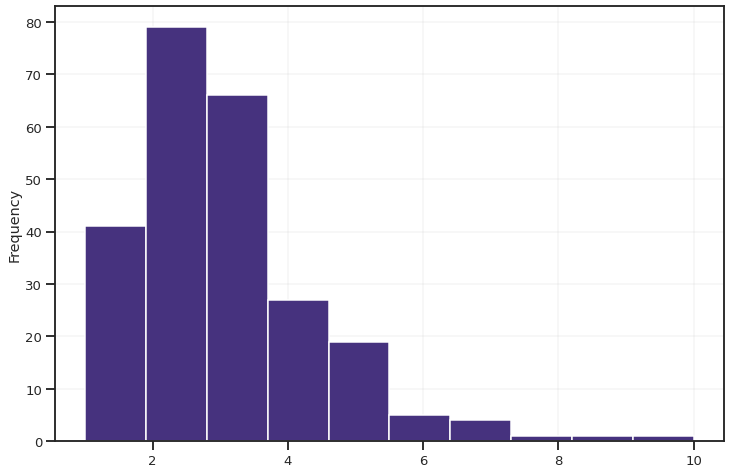

In [ ]:
# histrograma em matplotlib

df_tips['tip'].plot.hist()

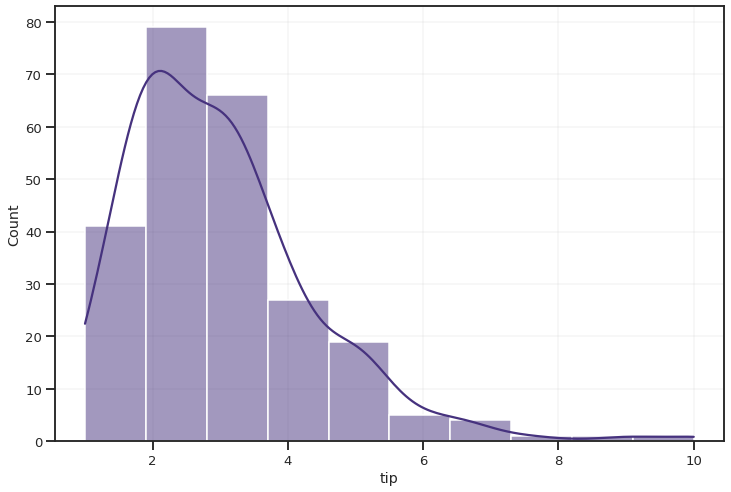

In [ ]:
# histograma em seaborn

sns.histplot(x = df_tips['tip'], kde = True, bins = 10)

In [ ]:
# histograma em plotly
# outra forma px.histogram(df_tips, x = 'tip')
px.histogram(x = df_tips['tip'])

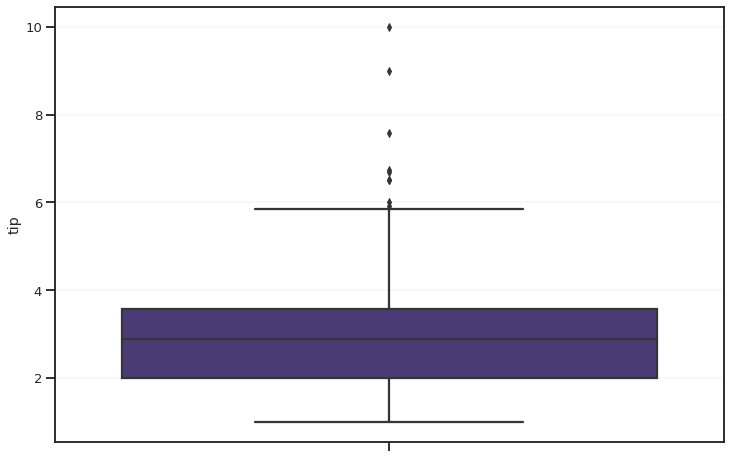

In [ ]:
# boxplot seaborn

sns.boxplot(data = df_tips, y='tip')

In [ ]:
# boxplot em px

px.box(df_tips, y='tip')

In [ ]:
# possivel colocar vários tipos d graficos comparativos no parametro marginal
# px.histogram(df_tips, x = 'tip', marginal='rug')
px.histogram(df_tips, x = 'tip', marginal='box')

In [ ]:
# tabela de frequencia absoluta

df_tips['day'].value_counts()



Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
# tabela de frequencia relativa

df_tips['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [ ]:
# tabela de frequencia relativa - dataframe

df_tips['day'].value_counts(normalize=True).to_frame('count_pct').rename_axis('day').reset_index()



,day,count_pct
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


In [ ]:
# biblioteca sidetable - frequencia

df_tips.stb.freq(['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



count                  61.000000
percent                25.000000
cumulative_count      179.750000
cumulative_percent     73.668033
dtype: float64

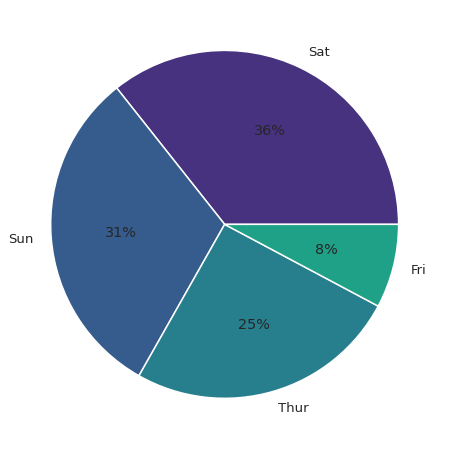

In [ ]:
df_counts = df_tips.stb.freq(['day'])

plt.pie(x = df_counts['count'], labels = df_counts.day, autopct='%.0f%%');

In [ ]:
px.pie(df_counts, names='day', values='count')

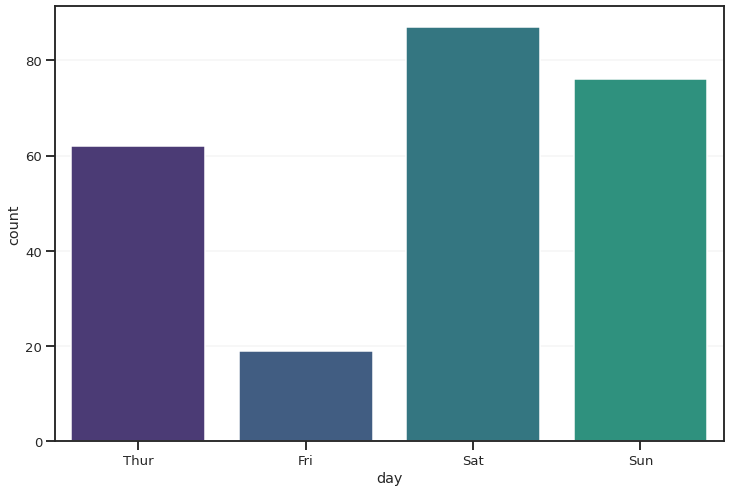

In [ ]:
sns.barplot(data = df_counts, x = 'day', y = 'count')

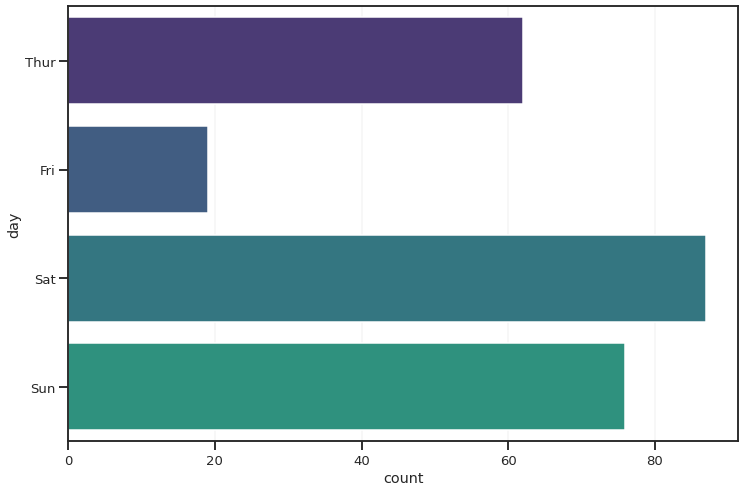

In [ ]:
sns.countplot(data = df_tips, y='day')

In [ ]:
# covariancia

np.cov(df_tips['total_bill'], df_tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [ ]:
pd.DataFrame(data =  np.cov(df_tips['total_bill'], df_tips['tip']), index = ['total_bill', 'tip'], columns = ['total_bill', 'tip' ])

,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


In [ ]:
# coeficiente de correlação

np.corrcoef(df_tips['total_bill'], df_tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [ ]:
pd.DataFrame(data =  np.corrcoef(df_tips['total_bill'], df_tips['tip']), index = ['total_bill', 'tip'], columns = ['total_bill', 'tip' ])

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [ ]:
# Correlação Pandas

df_tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
# tabela e frequencia ou tabela de contingencia
# chi2 significantemente positivo -> existe associação

crosstab = pd.crosstab(df_tips['sex'], df_tips['smoker'])

chi2, p, dof, expected = stats.chi2_contingency(crosstab)

print(chi2, p)

# resultado nos leva a crer que nada associa essas variáveis

0.0 1.0


In [ ]:
# metodo cramer
# quanto mais próximo de 1, maior a associação

stats.contingency.association(crosstab)

0.0028159517336962033

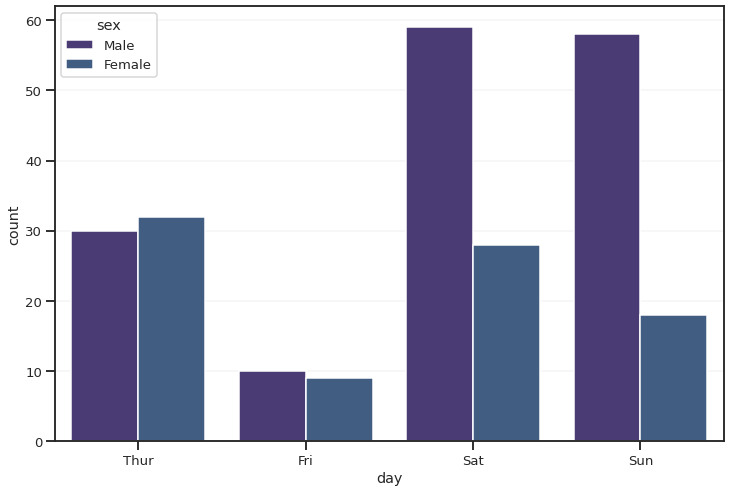

In [ ]:
sns.countplot(data = df_tips, x = 'day', hue = 'sex')

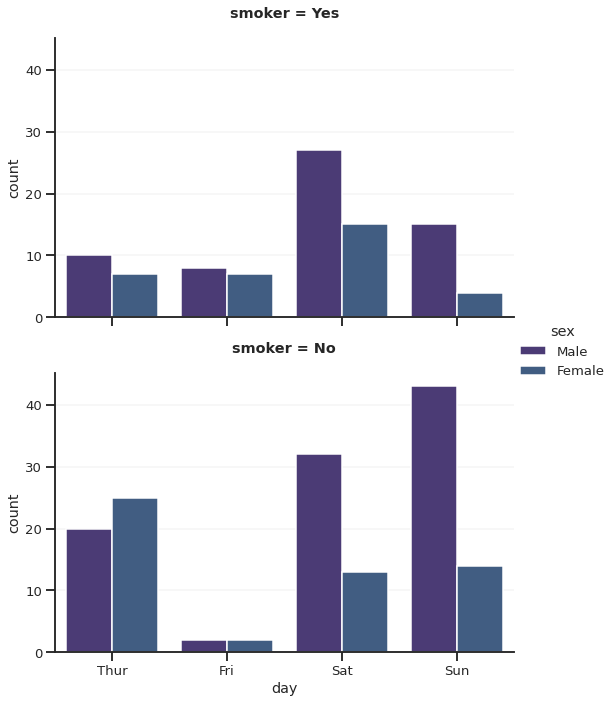

In [ ]:
# plotando grafico de variáveis categóricas

sns.catplot(data = df_tips, x = 'day', hue = 'sex', kind = 'count', row = 'smoker', aspect = 1.5)

In [ ]:
#gerando tabelas de frequencia

df_cat = df_tips.stb.freq(['day', 'sex'])
df_cat

,day,sex,count,percent,cumulative_count,cumulative_percent
0,Sat,Male,59,24.180328,59,24.180328
1,Sun,Male,58,23.770492,117,47.950820
2,Thur,Female,32,13.114754,149,61.065574
3,Thur,Male,30,12.295082,179,73.360656
4,Sat,Female,28,11.475410,207,84.836066
5,Sun,Female,18,7.377049,225,92.213115
6,Fri,Male,10,4.098361,235,96.311475
7,Fri,Female,9,3.688525,244,100.000000


In [ ]:
# grafico de barras com plotly - bom metodo para verificar associações entre variáveis categóricas

px.bar(df_cat, x = 'day', y = 'count', color = 'sex', barmode = 'group')

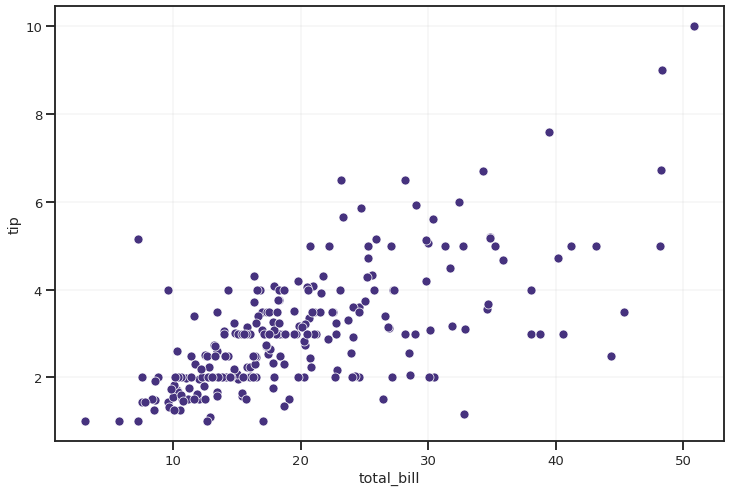

In [ ]:
sns.scatterplot(data = df_tips, x='total_bill', y='tip', )

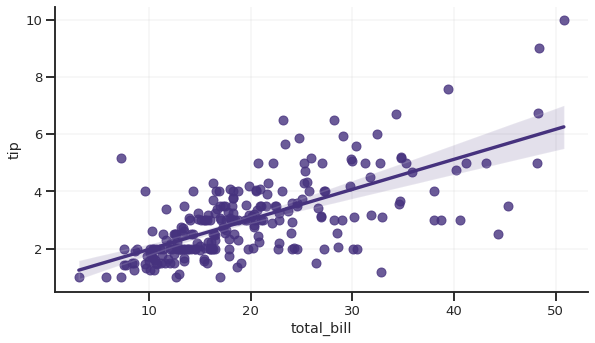

In [ ]:
sns.lmplot(data = df_tips, x='total_bill', y='tip', aspect = 1.7  )

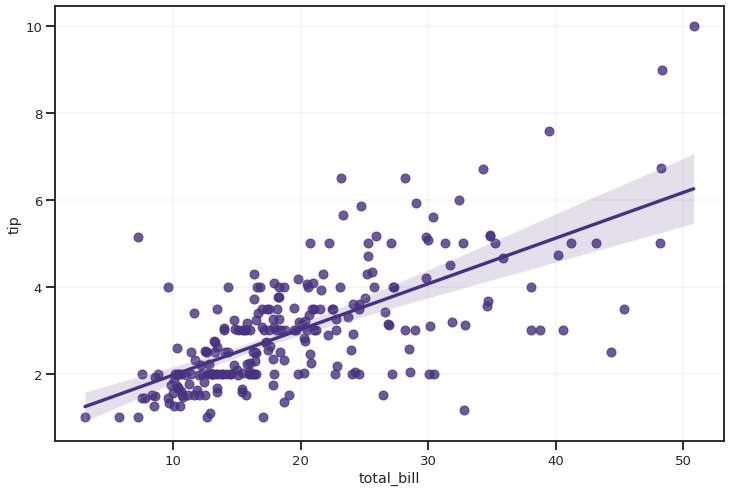

In [ ]:
sns.regplot(data = df_tips, x='total_bill', y='tip', )

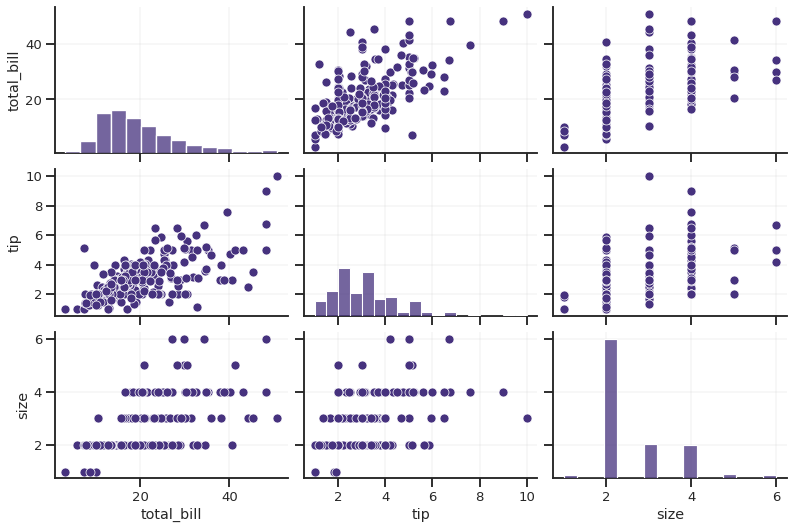

In [ ]:
sns.pairplot(data = df_tips, aspect = 1.5)

In [ ]:
#criando dataset de correção

dfc = df_tips.corr()
dfc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


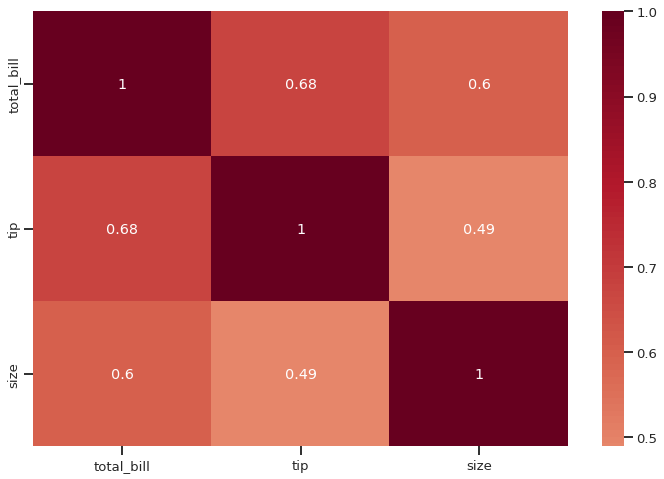

In [ ]:
sns.heatmap(dfc, annot = True, cmap = 'RdBu_r', center = 0);

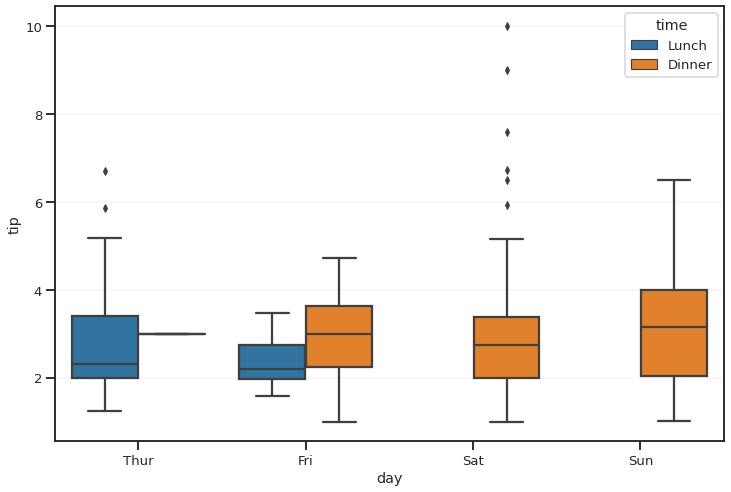

In [ ]:
# box plot - para variáveis categóricas

sns.boxplot(data = df_tips, x = 'day', y = 'tip', hue = 'time', palette = 'tab10')

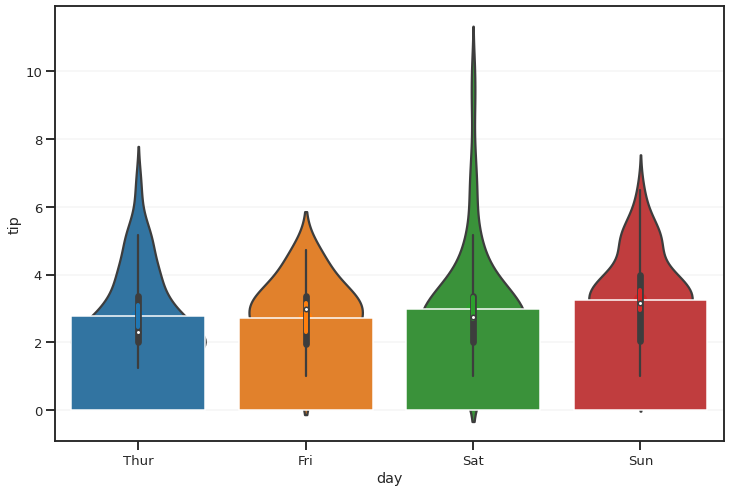

In [ ]:
# grafico de barras com variáveis categóricas

sns.barplot(data = df_tips, x = 'day', y = 'tip', palette = 'tab10')
sns.violinplot(data = df_tips, x = 'day', y = 'tip', palette = 'tab10')
sns.pointplot(data = df_tips, x = 'day', y = 'tip', palette = 'tab10')

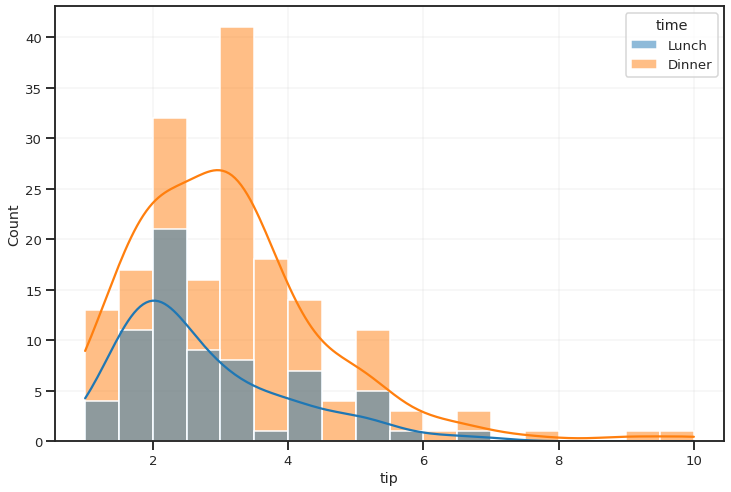

In [ ]:
sns.histplot(data = df_tips, x = 'tip', hue = 'time', palette = 'tab10', kde = True)